# Лабораторная работа 2. Композиции алгоритмов. Ранжирование.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_02.ipynb.

## Bias-Variance decomposition. Композиции алгоритмов

![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Рассмотрим задачу регрессии со среднеквадратичной функцией потерь, а также некоторый алгорим $a$. Тогда качество алгоритма $a$ может быть записано следующим образом:

$$Q(a) = \mathbb{E}_{X^l} \mathbb{E}_{x,y}(a(x) - y)^2$$

где первое матожидание вычисляется по всевозможным обучающим выборкам $X^l$. К сожалению, на реальных данных эта формула неприменима из-за невозможности сгенерировать необходимые для оценки данные. Поэтому проведем приближенный численный эксперимент с эмпирическими оценками матожиданий.

Обозначим вектор истинных меток тестовой выборки за $y \in \mathbb{R}^{l}$. С помощью бутстраппинга можно просемплировать из обучающей выборки $N$ новых выборок того же размера, тем самым "имитируя" пространство всевозможных обучающих выборок, после чего обучить на каждой выбранный алгоритм. Векторы прогнозов для объектов из тестовой выборки для каждой модели обозначим за $\hat{y}_i \in \mathbb{R}^{l}, i \in \{1, .., N\}$. Тогда средний квадрат ошибки по всем моделям на тестовой выборке запишется как

$$error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i)$$

Обозначим среднее предсказание за $$\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i$$

Тогда квадрат отклонения среднего предсказания и разброс прогнозов относительно среднего предсказания всех моделей на тестовой выборке от истинных меток запишутся следующим образом, соответственно:

$$bias^2 = MSE(y, \overline y)$$

$$variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y)$$


Для начала рассмотрим в качестве алгоритма решающее дерево. Как известно, при увеличении высоты дерева алгоритм может быть сильно чувствителен к составу обучающей выборки. Чтобы подтвердить эти предположения, проведите следующие эксперименты.

Загрузите [набор данных](http://archive.ics.uci.edu/ml/datasets/BlogFeedback). Каждый объект — пост в блоге. Он описывается различными признаками: длина текста поста, наличие наиболее частотных слов, день недели, количество комментариев за последние 24 часа и т.п., а так же целевым признаком — количеством комментариев к посту. Полный список признаков и описание находятся на странице датасета. 

Разбейте данные из файла **blogData_train.csv** на обучающую и тестовую выборки в пропорциях 1 к 4 соответственно. Обратите внимание, что обучающая выборка меньше тестовой. Такая большая тестовая выборка позволит сделать измерение качества моделей достаточно достоверным. 

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import randint
import xgboost as xgb
% matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
data = pd.read_csv('/home/dmitry/Downloads/data/shad/lab2/BlogFeedback/blogData_train.csv', header=None)

In [13]:
X = data.drop(280, axis=1)
y = data[280]

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

**(1 балл)** Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=100$. 

In [62]:
N = 100

list_errors = []
list_bias_sqr = []
list_variances = []
for depth in range(1, 16):
    y_pred = np.zeros((N, len(X_val)))
    error = 0
    for it in range(N):
        rand_idx = randint(0, len(X_train), len(X_train))
        X_train_sample = X_train.iloc[rand_idx]
        y_train_sample = y_train.iloc[rand_idx]
        assert X_train_sample.shape == X_train.shape and y_train_sample.shape == y_train.shape
        tree = DecisionTreeRegressor(max_depth=depth, random_state=0)
        tree.fit(X_train_sample, y_train_sample)
        y_pred[it, :] = tree.predict(X_val)
        error += mean_squared_error(y_val, y_pred[it, :])
    y_mean = np.mean(y_pred, axis=0)
    assert len(y_mean) == len(X_val)
    error /= N
    bias_sqr = mean_squared_error(y_val, y_mean)
    variance = np.mean(np.apply_along_axis(lambda x: mean_squared_error(x, y_mean), 1, y_pred))
    print("depth = {} N = {} error = {} bias^2 = {} variance = {}".format(depth, N, error, bias_sqr, variance))
    list_errors.append(error)
    list_bias_sqr.append(bias_sqr)
    list_variances.append(variance)

depth = 1 N = 100 error = 1007.90584862 bias^2 = 1004.050959 variance = 3.8548896245
depth = 2 N = 100 error = 841.286099693 bias^2 = 784.385088139 variance = 56.9010115543
depth = 3 N = 100 error = 766.571345562 bias^2 = 688.059034149 variance = 78.5123114132
depth = 4 N = 100 error = 763.867941191 bias^2 = 653.791997994 variance = 110.075943197
depth = 5 N = 100 error = 799.639672088 bias^2 = 639.759806376 variance = 159.879865712
depth = 6 N = 100 error = 857.476495818 bias^2 = 634.469646611 variance = 223.006849207
depth = 7 N = 100 error = 921.996180264 bias^2 = 628.701651218 variance = 293.294529046
depth = 8 N = 100 error = 973.537215369 bias^2 = 626.987742852 variance = 346.549472517
depth = 9 N = 100 error = 1036.84799492 bias^2 = 629.479652014 variance = 407.36834291
depth = 10 N = 100 error = 1094.30054391 bias^2 = 637.454524688 variance = 456.846019227
depth = 11 N = 100 error = 1116.8840911 bias^2 = 633.836497414 variance = 483.047593682
depth = 12 N = 100 error = 1161.985

In [75]:
def build_plots(ax, list_errors, list_bias_sqr, list_variances):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(ax, list_errors)
    plt.title('error')
    plt.subplot(1, 3, 2)
    plt.plot(ax, list_bias_sqr)
    plt.title('bias^2')
    plt.subplot(1, 3, 3)
    plt.plot(ax, list_variances)
    plt.title('variance')

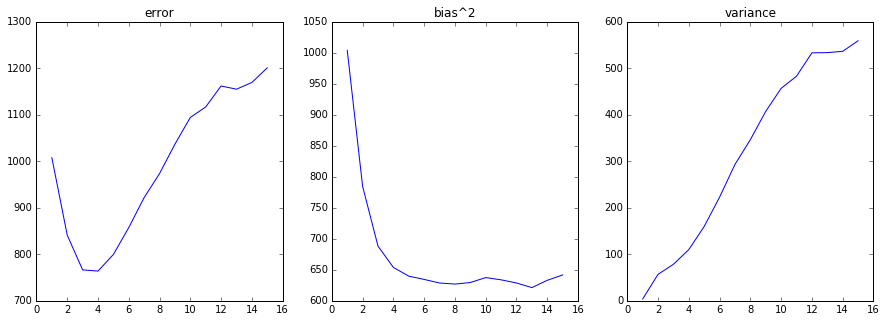

In [76]:
build_plots(range(1, 16), list_errors, list_bias_sqr, list_variances)

**(1 балл)** Являются ли какие-то из полученных графиков монотонными? А должны ли они быть монотонными, если бы гипотетически эксперименты были проведены на всевозможных выборках? Почему? Убедитесь численно, что верно bias-variance разложение ошибки: $$error = bias^2 + variance$$

Полученные графики не являются монотонными из-за того, что мы аппроксимируем искомые значения. Если бы эксперименты проводились для всевозможных выборок, то тогда $bias^2$ убывал бы с ростом сложности модели (т.е. с увеличением глубины дерева), $variance$ монотонно возрастал бы. Соответствующий график приведен выше в теоретической секции.

$bias$ показывает, насколько отличается наше среднее предсказание от правильного, если модель достаточно сложная, то она сможет обучиться достаточно хорошо "в среднем" за счет большей гибкости.

$variance$ показывает разброс предсказанных значений для разных выборок, чем сложнее модель, тем больше будет зависеть от конкретной обучающей выборки.

Выведем таблицу с разностью $error$ и $bias^2+variance$ для рассмотренных глубин. Заметим, что разность эта очень мала как абсолютно, так и относительно.

In [90]:
df = pd.DataFrame()
diffs = []
for j in range(len(list_errors)):
    diffs.append(list_errors[j] - list_bias_sqr[j] - list_variances[j])
df['depth'] = range(1, 16)
df['difference'] = diffs
df['relative difference (to error)'] = np.abs(diffs) / list_errors
df

,depth,difference,relative difference (to error)
0,1,-8.970602e-14,8.900238e-17
1,2,-1.776357e-13,2.111478e-16
2,3,4.263256e-14,5.561461e-17
3,4,-1.705303e-13,2.232457e-16
4,5,8.526513e-14,1.066294e-16
5,6,4.547474e-13,5.303321e-16
6,7,3.410605e-13,3.699153e-16
7,8,-3.979039e-13,4.087198e-16
8,9,-4.547474e-13,4.385863e-16
9,10,2.842171e-13,2.597249e-16


## Композиции алгоритмов

Несмотря на описанный выше недостаток решающих деревьев, объединение их в композиции позволяет существенно улучшить качество предсказания. Рассмотрим несколько способов построения композиций.

### Bagging + RSM

![](https://sites.google.com/site/rajhansgondane2506/_/rsrc/1467898300734/publications/rrftrain.jpg?height=215&width=320)

Один из способов объединения алгоритмов в композиции — обучение каждого отдельного алгоритма на некоторой подвыборке из исходной выборки ([bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)) и подмножестве исходных признаков ([RSM](https://en.wikipedia.org/wiki/Random_subspace_method)). В sklearn этот тип композиции реализован в классе [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (для случая регресии). Подобный подход также есть в реализации [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Градиентный бустинг

В случае бустинга композиция алгоритмов строится последовательно. Каждый следующий базовый алгоритм акцентируется на тех объектах, на которых обученная ранее композиция допускала ошибку.

На данный момент одной из самых широко распространенных реализаций бустинга является библиотека [XGBoost](https://github.com/dmlc/xgboost). В ней большое внимание уделяется регуляризации и скорости, нежели в других реализациях бустинга (например,  [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) из sklearn). Кроме того, XGBoost позволяет оптимизировать различные функции потерь, а также более гибок, засчет большого числа параметров.

XGBoost строит композицию из $K$ базовых алгоритмов $b_k$:

$$ \hat{y}_i = \hat{y}_i^{K} = \sum_{k=1}^{K} b_k(x_i) = \hat{y}_i^{\left(K - 1\right)} + b_K(x_i), $$

минимизируя следующий функционал:

$$ Obj = \sum_{i=1}^N \mathcal{L}(y_i, \hat{y}_i ) + \sum_{k=1}^{K} \Omega(b_k),$$

где
 - $N$ — размер обучающей выборки;
 - $x_i, y_i, \hat{y}_i$ — i-ый объект, правильный ответ и предсказание модели для него;
 - $\hat{y}_i^{t}$ — предсказание композиции из $t$ уже обученных базовых алгоритмов для i-го объекта;
 - $\Omega$ — регуляризатор;
 - $\mathcal{L}(y_i, \hat{y}_i)$ — функция потерь.

Функционал, оптимизируемый на $t$-ой итерации:

$$ Obj^{(t)} = \sum_{i=1}^N \mathcal{L}\left(y_i, \hat{y}_i^{(t-1)} + b_t(x_i)\right) + \Omega(b_t).$$

В случае бустинга над решающими деревьями регуляризатор имеет следующий вид:

$$ \Omega(b_t) = \gamma T + \frac{1}{2}\lambda\sum_{j=1}^{T}w_j^2 + \alpha\sum_{j=1}^{T}w_j,$$

где 
 - $T$ — количество листьев в дереве;
 - $w_j$ — веса в листьях дерева;
 - $\lambda, \alpha, \gamma$ — гиперпараметры.

Данный регуляризатор подобран эвристически и хорошо показывает себя на практике. 

Раскладывая в ряд Тейлора выражение $\mathcal{L}\left(y_i, \hat{y}_i^{\left(t-1\right)} + b_t(x_i)\right)$ до второго порядка, получаем:

$$ Obj^{(t)} = \sum_{i=1}^N\left[\mathcal{L}(y_i, \hat{y}_i^{\left(t-1\right)}) + g_{i}b_{t}(x_i) + \frac{1}{2}h_{i}b_{t}^2(x_i)\right] + \Omega(b_t),$$

где $g_i = \partial_{\hat{y}_i^{(t-1)}} \mathcal{L}(y_i, \hat{y_i}^{(t-1)})$, $h_i = \partial_{\hat{y}_i^{(t-1)}}^2 \mathcal{L}(y_i, \hat{y}_i^{(t-1)}) $ — градиент и гессиан оптимизируемой функции потерь.

Приводя теперь подобные слагаемые и отбрасывая слагаемое $ \mathcal{L}(y_i, \hat{y}_i^{(t-1)}) $, не зависящее от $ b_t(x_i)$ (а следовательно, не влияющее на точку минимума функционала), получаем формулу:
$$ Obj^{(t)} \simeq \sum_{j=1}^{T}\left[\sum_{i \in I_j} g_i w_j + \frac{1}{2}\sum_{i \in I_j} (h_i + \lambda)w_j^2\right] + \gamma T$$
$$ = \sum_{j=1}^{T}\left[G_jw_j + \frac{1}{2}(H_j + \lambda)w_j^2\right] + \gamma T, $$

где 
 - $ I_j $ - множество объектов обучающей выборки, попавших в $j$-ый лист дерева;
 - $ G_j = \sum_{i \in I_j} g_i$;
 - $ H_j = \sum_{i \in I_j} h_i$.
 
Теперь, имея заданную структуру дерева, можно аналитически вычислить оптимальные значения для весов:
$$ w_j^* = -\frac{G_j}{H_j + \lambda}.$$

Значение функционала при этом будет равно:

$$ Obj = -\frac{1}{2}\sum_{j=1}^T \frac{G_j^2}{H_j + \lambda} + \gamma T .$$

Осталось только построить дерево оптимальной структуры. Это можно делать известными методами построения решающих деревьев, проводя разбиения таким образом, чтобы максимизировать gain, определенный как уменьшение $Obj$ в момент этого разбиения. Для уже построенного дерева по формулам $ w_j^* $ вычисляются оптимальные значения в листьях.

В XGBoost реализовано несколько различных функций потерь, что позволяет решать задачи классификации (бинарной и мультиклассовой), регрессии и ранжирования. Вот некоторые из них:

- reg:linear — линейная регрессия
- reg:logistic — логистическая регрессия
- binary:logistic — логистическая регрессия
- multi:softmax — softmax функция потерь для многоклассовой классификации
- rank:pairwise — минимизация pairwise-функции потерь для задачи ранжирования

**(1 балл)** Проведите аналогичный эксперимент с bias-variance разложением для градиентного бустинга для количество алгоритмов 1, 5, 10, 25 и 50, используя в качестве базовых алгоритмов решающие деревья. Пример использования библиотеки можно найти в туториале с [семинара про XGBoost](https://nbviewer.jupyter.org/urls/dl.dropbox.com/s/b1lm8e763tsxly5/xgboost_tutorial.ipynb). Обратите внимание, что данная библиотека имеет два интерфейса (стандартный и аналог sklearn), названия параметров в которых могут отличаться.

In [79]:
xgb_lst_bais_sqr = []
xgb_lst_variances = []
xgb_lst_errors = []
estim_lst = [1, 5, 10, 25, 50]
xgtest = xgb.DMatrix(X_val, label=y_val)

param = {}
param['booster'] = 'gbtree'
param['objective'] = 'reg:linear'
param["eval_metric"] = 'rmse'
param['silent'] = 1
param['nthread'] = 4
N = 100

xgb_list_errors = []
xgb_list_bias_sqr = []
xgb_list_variances = []

for n_estim in estim_lst:
    y_pred = np.zeros((N, len(X_val)))
    error = 0
    for it in range(N):
        rand_idx = randint(0, len(X_train), len(X_train))
        X_train_sample = X_train.iloc[rand_idx]
        y_train_sample = y_train.iloc[rand_idx]
        
        xgtrain = xgb.DMatrix(X_train_sample, label=y_train_sample)

        bst = xgb.train(param, xgtrain, n_estim)
        y_pred[it, :] = bst.predict(xgtest)
        error += mean_squared_error(y_val, y_pred[it, :])
        
    y_mean = np.mean(y_pred, axis=0)
    assert len(y_mean) == len(X_val)
    error /= N
    bias_sqr = mean_squared_error(y_val, y_mean)
    variance = np.mean(np.apply_along_axis(lambda x: mean_squared_error(x, y_mean), 1, y_pred))
    print("n_estim = {} N = {} error = {} bias^2 = {} variance = {}".format(n_estim, N, error, bias_sqr, variance))
    xgb_list_errors.append(error)
    xgb_list_bias_sqr.append(bias_sqr)
    xgb_list_variances.append(variance)

n_estim = 1 N = 100 error = 973.493255419 bias^2 = 958.255523836 variance = 15.2377315838
n_estim = 5 N = 100 error = 675.49422701 bias^2 = 623.287967036 variance = 52.2062599744
n_estim = 10 N = 100 error = 685.751610387 bias^2 = 617.046308501 variance = 68.7053018862
n_estim = 25 N = 100 error = 707.507303396 bias^2 = 623.501363758 variance = 84.0059396382
n_estim = 50 N = 100 error = 724.916952132 bias^2 = 629.917311072 variance = 94.9996410598


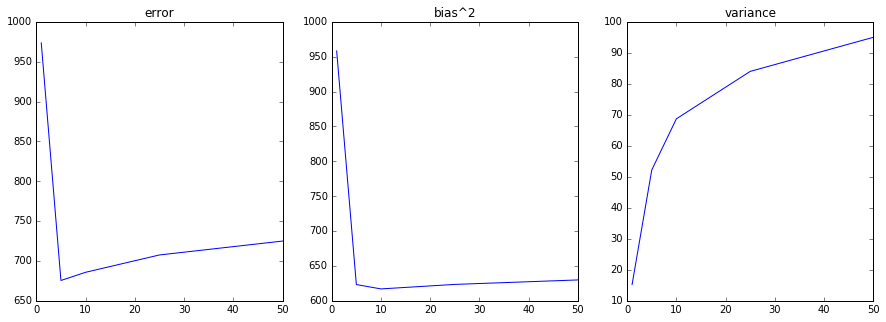

In [92]:
#Графики для XGBoost
build_plots(estim_lst, xgb_list_errors, xgb_list_bias_sqr, xgb_list_variances)

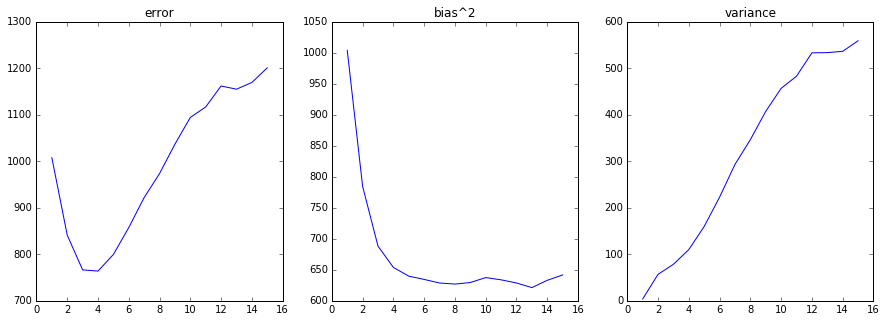

In [93]:
#Графики для DecisionTree
build_plots(range(1, 16), list_errors, list_bias_sqr, list_variances)

**(0.5 балла)** Отличаются ли графики в рассмотренных моделях (решающее дерево, градиентный бустинг на решающих деревьях)  между собой? На какую компоненту из разложения ошибки влияет объединение алгоритмов в рассмотренный тип композиции?

Выше приведены графики для обеих моделей. Во-первых, ошибка $error$ у XGBoost растет с переобучением не так резко, как у решающего дерева. Во-вторых, $bias^2$ в обоих случаях находится примерно на одном уровне, а вот $variance$ значительно больше у решающего дерева. Т.е. таким образом мы эспериментально подтвердили, что композиция уменьшает $variance$, но не $bias$.

## Поисковое ранжирование

![](http://i.imgur.com/2QnD2nF.jpg)

Задачу поискового ранжирования можно описать следующим образом: имеется множество документов $d \in D$ и множество запросов $q \in Q$. Требуется оценить *степень релевантности* документа по отношению к запросу: $(q, d) \mapsto r$, относительно которой будет производиться ранжирование. Для восстановления этой зависимости используются методы машинного обучения. Обычно используется три типа:
 - признаки запроса $q$, например: мешок слов текста запроса, его длина, ...
 - документа $d$, например: значение PageRank, мешок слов, доменное имя, ...
 - пары $(q, d)$, например: число вхождений фразы из запроса $q$ в документе $d$, ...

Одна из отличительных особенностей задачи ранжирования от классических задач машинного обучения заключается в том, что качество результата зависит не от предсказанных оценок релевантности, а от порядка следования документов в рамках конкретного запроса, т.е. важно не абсолютное значение релевантности (его достаточно трудно формализовать в виде числа), а то, более или менее релевантен документ, относительно других документов.

### Оценка качества

Для оценивания качества ранжирования найденных документов в поиске используются асессорские оценки. Само оценивание происходит на скрытых от обучения запросах $Queries$. Для этого традиционно используется метрика *DCG* ([Discounted Cumulative Gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain)) и ее нормализованный вариант — *nDCG*, всегда принимающий значения от 0 до 1.
Для одного запроса DCG считается следующим образом:
$$ DCG = \sum_{i=1}^P\frac{(2^{rel_i} - 1)}{\log_2(i+1)}, $$

где $P$ — число документов в поисковой выдаче, $rel_i$ — релевантность (асессорская оценка) документа, находящегося на i-той позиции.

*IDCG* — идеальное (наибольшее из возможных) значение *DCG*, может быть получено путем ранжирования документов по убыванию асессорских оценок.

Итоговая формула для расчета *nDCG*:

$$nDCG = \frac{DCG}{IDCG} \in [0, 1].$$

Чтобы оценить значение *nDCG* на выборке $Queries$ ($nDCG_{Queries}$) размера $N$, необходимо усреднить значение *nDCG* по всем запросам  выборки:
$$nDCG_{Queries} = \frac{1}{N}\sum_{q \in Queries}nDCG(q).$$

Пример реализации метрик ранжирование на python можно найти [здесь](https://gist.github.com/mblondel/7337391).

Загрузите данные конкурса [Интернет-математика 2009](http://imat2009.yandex.ru/datasets). Там же находится описание данных. Разбейте обучающую выборку на обучение и контроль в соотношении 70 / 30. Обратите внимание на формат данных: разбивать необходимо множество запросов, а не строчки датасета.

In [2]:
import re
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Lasso

/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [22]:
f = open('/home/dmitry/Downloads/data/shad/lab2/imat2009-datasets/imat2009_learning.txt')
#df = pd.DataFrame(columns = ['relevance'] + range(1, 246))
i = 0
table = []
query_id = []
for l in f:
    lst = re.split("[: ]", l)
    part = [0] * 246
    part[0] = float(lst[0])
    for j in range(1, len(lst) - 2, 2):
        part[int(lst[j])] = float(lst[j + 1])
    #df.loc[i] = part
    query_id.append(int(lst[-1]))
    table.append(part)
    i += 1
df = pd.DataFrame(table, columns = ['relevance'] + range(1, 246))

In [44]:
df['query_id'] = query_id
X_train, X_val, y_train, y_val = train_test_split(df.drop('relevance', axis=1), df['relevance'], test_size=0.3)
train_query_id = X_train['query_id']
X_train = X_train.drop('query_id', axis=1)
X_val = X_val.drop('query_id', axis=1)

Далее рассмотрим несколько подходов предсказания релевантности. Для оценивания качества моделей используйте метрику nDCG на контроле. В случае подбора гиперпараметров используйте кросс-валидацию по 5 блокам.

**(1 балл)** [Point-wise](https://en.wikipedia.org/wiki/Learning_to_rank#Pointwise_approach) подход. В этом случае значение функции потерь определяется по одному объекту, например, как в случае регрессии. Воспользовавшись известными вам техниками построения линейной регрессии, обучите модель, предсказывающую оценку асессора.

In [8]:
def dcg_score(y_true, y_score, k=10):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    gains = 2 ** y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gains / discounts)

def ndcg_score(regr, X, y_true, k=10):
    y_score = regr.predict(X)
    best = dcg_score(y_true, y_true, k)
    actual = dcg_score(y_true, y_score, k)
    return actual / best

In [136]:
params = {'alpha': np.linspace(1e-5, 1e-4, 4)}
gs = GridSearchCV(Lasso(normalize=True), params, scoring=ndcg_score, refit=True, cv=5, n_jobs=4)
gs.fit(X_train, y_train)
print gs.best_estimator_, gs.best_params_, gs.best_score_

Lasso(alpha=1.0000000000000001e-05, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False) {'alpha': 1.0000000000000001e-05} 0.811412315185


**(1 балл)** [Pair-wise](https://en.wikipedia.org/wiki/Learning_to_rank#Pairwise_approach) подход. Здесь функция потерь вычисляется по паре объектов. Постройте ранжирующую модель при помощи [SVMlight](http://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html), реализующий [Ranking SVM](https://en.wikipedia.org/wiki/Ranking_SVM).

In [214]:
!./svm_rank_learn -c 20.0  -e 0.9885 train_set.txt model.dat

Reading training examples...done
Training set properties: 245 features, 1 rankings, 68103 examples
NOTE: Adjusted stopping criterion relative to maximum loss: eps=1659268557.424500
Iter 1: .*(NumConst=1, SV=1, CEps=1678572137.0000, QPEps=29.3874)
Iter 2: .(NumConst=1, SV=1, CEps=1655040249.2999, QPEps=29.3874)
Final epsilon on KKT-Conditions: 1655040249.29986
Upper bound on duality gap: 33100804985.99715
Dual objective value: dval=0.55931
Primal objective value: pval=33100804986.55646
Total number of constraints in final working set: 1 (of 1)
Number of iterations: 2
Number of calls to 'find_most_violated_constraint': 2
Number of SV: 1 
Norm of weight vector: |w|=1.05764
Value of slack variable (on working set): xi=3.04986
Value of slack variable (global): xi=1655040249.29986
Norm of longest difference vector: ||Psi(x,y)-Psi(x,ybar)||=1587085952.37762
Runtime in cpu-seconds: 51.03
Compacting linear model...done
Writing learned model...done


In [215]:
!./svm_rank_classify val_set.txt model.dat predictions

Reading model...done.
Reading test examples...done.
Classifying test examples...done
Runtime (without IO) in cpu-seconds: 0.02
Average loss on test set: 0.3447
Zero/one-error on test set: 100.00% (0 correct, 1 incorrect, 1 total)
NOTE: The loss reported above is the fraction of swapped pairs averaged over
      all rankings. The zero/one-error is fraction of perfectly correct
      rankings!
Total Num Swappedpairs  : 107303504
Avg Swappedpairs Percent:  34.47


###  Ранжируем с XGBoost

XGBoost имеет несколько функций потерь для решения задачи ранжирования:
1. **reg:linear** — эта функция потерь нужна для решения задачи регрессии, тем не менее, ее можно использовать в качестве ранжирующей point-wise модели.
2. **rank:pairwise** — в качестве pairwise модели в XGBoost реализован [RankNet](http://research.microsoft.com/en-us/um/people/cburges/papers/ICML_ranking.pdf), в котором минимизируется гладкий функционал качества ранжирования: $$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = log(1 + e^{-M}), $$ где $ a(x) $ - функция ранжирования. Суммирование ведется по всем парам объектов, для которых определено отношение порядка, например, для пар документов, показанных по одному запросу. Таким образом функция потерь штрафует за то, что пара объектов неправильно упорядочена.
3. **rank:map, rank:ndcg** — реализация [LambdaRank](http://research.microsoft.com/en-us/um/people/cburges/papers/lambdarank.pdf) для двух метрик: [MAP](https://www.kaggle.com/wiki/MeanAveragePrecision) и **nDCG**. Известно, что для того, чтобы оптимизировать негладкий функционал, такой как **nDCG**,  нужно домножить градиент функционала $ Obj(a) $ на значение $\Delta NDCG_{ij} $ — изменение значения функционала качества при замене $x_i$ на $ x_j$.  Поскольку для вычисления метрик необходимы все объекты выборки, то эти две ранжирующие функции потерь являются представителями класса [list-wise](https://en.wikipedia.org/wiki/Learning_to_rank#Listwise_approach) моделей.

**(1 балл)** Обучите модели **rank:pairwise** и **rank:ndcg**, в качестве метрики оценки качества (*eval_metric*) используя *nDCG*, а в качестве бустера решающее дерево. Рассмотрите различные [параметры](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md) бустера: *eta*, *gamma*, *tree_method*. Какие параметры сильнее всего влияют на качество?

### Eta

в случае rank:ndcg не влияет, иначе влияет незначительно, а именно при изменении $eta$ качество на валидации колеблется от 0.944 до 0.952

In [14]:
xgtrain = xgb.DMatrix(X_train, label=y_train)
xgtest = xgb.DMatrix(X_val, label=y_val)
param = {}
param['silent'] = 0
param['booster'] = 'gbtree'
evals = [(xgtrain, 'train'), (xgtest, 'val')]
n_iter = 100
for obj in ['rank:pairwise', 'rank:ndcg']:
    for eta in np.linspace(0.1, 1, 10):
        param['objective'] = obj
        param["eval_metric"] = 'ndcg'
        param['eta'] = eta
        print "obj = {} eta = {}".format(obj, eta)
        bst = xgb.train(param, xgtrain, n_iter, evals = evals, verbose_eval=n_iter-1)

obj = rank:pairwise eta = 0.1
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.951829	val-:0.944584
obj = rank:pairwise eta = 0.2
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.957989	val-:0.948802
obj = rank:pairwise eta = 0.3
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.960581	val-:0.9471
obj = rank:pairwise eta = 0.4
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.962094	val-:0.947203
obj = rank:pairwise eta = 0.5
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.963869	val-:0.952257
obj = rank:pairwise eta = 0.6
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.964057	val-:0.947245
obj = rank:pairwise eta = 0.7
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.967674	val-:0.951548
obj = rank:pairwise eta = 0.8
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.966026	val-:0.945138
obj = rank:pairwise eta = 0.9
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.967236	val-:0.947689
obj = rank:pairwise eta = 1.0
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.966995	val-:0.946994
obj = rank:ndcg eta = 

### gamma

в случае 'rank:ndcg' - не влияет, в случае 'rank:pairwise' влияет существенно - при плохих значених параметра $gamma$, например, $1000$, score на валидации становится на $6$ процентов меньше, чем при оптимальных

In [16]:
for obj in ['rank:pairwise', 'rank:ndcg']:
    for gamma in [0, 1, 10, 50, 100, 500, 1000]:
        param['objective'] = obj
        param["eval_metric"] = 'ndcg'
        param['gamma'] = gamma
        print "obj = {} gamma = {}".format(obj, gamma)
        bst = xgb.train(param, xgtrain, n_iter, evals = evals, verbose_eval=n_iter-1)

obj = rank:pairwise gamma = 0
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.966995	val-:0.946994
obj = rank:pairwise gamma = 1
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.968216	val-:0.948247
obj = rank:pairwise gamma = 10
[0]	train-:0.916	val-:0.902459
[99]	train-:0.958749	val-:0.94582
obj = rank:pairwise gamma = 50
[0]	train-:0.910193	val-:0.896648
[99]	train-:0.938865	val-:0.930674
obj = rank:pairwise gamma = 100
[0]	train-:0.910588	val-:0.895649
[99]	train-:0.929481	val-:0.919865
obj = rank:pairwise gamma = 500
[0]	train-:0.890848	val-:0.875225
[99]	train-:0.909402	val-:0.896253
obj = rank:pairwise gamma = 1000
[0]	train-:0.889857	val-:0.874143
[99]	train-:0.896715	val-:0.882369
obj = rank:ndcg gamma = 0
[0]	train-:0.854691	val-:0.835376
[99]	train-:0.854691	val-:0.835376
obj = rank:ndcg gamma = 1
[0]	train-:0.854691	val-:0.835376
[99]	train-:0.854691	val-:0.835376
obj = rank:ndcg gamma = 10
[0]	train-:0.854691	val-:0.835376
[99]	train-:0.854691	val-:0.835376
obj = rank:ndcg ga

### tree_method

Не влияет ни в том, ни в другом случае

In [18]:
for obj in ['rank:pairwise', 'rank:ndcg']:
    for tree_method in ['exact', 'approx']:
        param['objective'] = obj
        param["eval_metric"] = 'ndcg'
        param['tree_method'] = tree_method
        print "obj = {} tree_method = {}".format(obj, tree_method)
        bst = xgb.train(param, xgtrain, n_iter, evals = evals, verbose_eval=n_iter-1)

obj = rank:pairwise tree_method = exact
[0]	train-:0.889857	val-:0.874143
[99]	train-:0.896715	val-:0.882369
obj = rank:pairwise tree_method = approx
[0]	train-:0.889857	val-:0.874143
[99]	train-:0.896715	val-:0.882369
obj = rank:ndcg tree_method = exact
[0]	train-:0.854691	val-:0.835376
[99]	train-:0.854691	val-:0.835376
obj = rank:ndcg tree_method = approx
[0]	train-:0.854691	val-:0.835376
[99]	train-:0.854691	val-:0.835376


#### Пользовательская функция потерь

Библиотека XGBoost позволяет использовать пользовательские функции потерь. Для этого необходимо реализовать функцию, принимающую на вход вектор предсказанных значений и обучающую выборку, и возвращающую градиент и гессиан, посчитанный по входным данным.

Важно отметить, что XGBoost использует диагональную аппроксимацию гессиана, таким образом все недиагональные элементы считаются малозначимыми и приравниваются нулю, поэтому и градиент, и гессиан являются векторами длины размера обучающей выборки.

**(2.5 балла)** Реализуйте экспоненциальную функцию потерь для XGBoost:
$$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = e^{-M} $$

Обучите модель с помощью данной функции потерь, настройте параметры.

** Производная по $a_i$ равна $e^{a_i}\sum_{i \prec j} e^{-a_j} -e^{-a_i}\sum_{j \prec i} e^{a_j}$. **

**Вторая производная по $a_i$ равна $e^{a_i}\sum_{i \prec j} e^{-a_j} + e^{-a_i}\sum_{j \prec i} e^{a_j}$. **

**Комментарии к реализации**

В случае ранжирования XGBoost'у необходимо знать о разбиении всех объектов на группы. В нашем случае в одну группу будут входить документы, соответствующие одному запросу. Функция, считающая градиент и гессиан по данным, должна знать данное разбиение датасета. Однако питоновский интерфейс класса *DMatrix* (в котором хранится датасет) не дает возможности получить это разбиение. В этом случае нужно реализовать функцию потерь в качестве функтора, конструктор которого принимает разбиение на группы в качестве параметра.

В туториале с семинара есть [пример](https://nbviewer.jupyter.org/urls/dl.dropbox.com/s/b1lm8e763tsxly5/xgboost_tutorial.ipynb#Кастомные-функции-потерь-/-метрики-качества) реализации функции потерь.

In [127]:
import math
def my_comp(labels):
    def compare(x, y):
        return 1 if labels[x] > labels[y] else (-1 if labels[x] < labels[y] else 0)
    return compare
        
class ExponentialPairwiseLoss(object):
    def __init__(self, query_id):
        self.queries = {}
        for j in range(len(query_id)):
            if query_id[j] in self.queries:
                self.queries[query_id[j]].append(j)
            else:
                self.queries[query_id[j]] = [j]
                        
    def __call__(self, preds, dtrain):
        grad = np.zeros(len(preds))
        gess = np.zeros(len(preds))
        labels = dtrain.get_label()
        for query_id in self.queries:
            order = sorted(self.queries[query_id], cmp=my_comp(labels))
            s = 0
            idx = len(order) - 1
            while idx >= 0:
                i = order[idx]
                grad[i] = gess[i] = math.exp(preds[i]) * s
                s += math.exp(-preds[i])
                idx -= 1
            
            s = 0
            for idx in range(len(order)):
                i = order[idx]
                grad[i] += -math.exp(-preds[i]) * s
                gess[i] += math.exp(-preds[i]) * s
                s += math.exp(preds[i])
        return grad, gess

In [130]:
param = {}
param['silent'] = 0
param['booster'] = 'gbtree'
evals = [(xgtrain, 'train'), (xgtest, 'val')]
n_iter = 100
epl = ExponentialPairwiseLoss(train_query_id.values.tolist())
#param['objective'] = epl
param["eval_metric"] = 'ndcg'
bst = xgb.train(param, xgtrain, n_iter, evals = evals, verbose_eval=10, obj = epl)

[0]	train-:0.919535	val-:0.911277
[10]	train-:0.952237	val-:0.946039
[20]	train-:0.955008	val-:0.948522
[30]	train-:0.95773	val-:0.950438
[40]	train-:0.958782	val-:0.950869
[50]	train-:0.959912	val-:0.951316
[60]	train-:0.961997	val-:0.952752
[70]	train-:0.962641	val-:0.952885
[80]	train-:0.963435	val-:0.953139
[90]	train-:0.964526	val-:0.953669


### Подбор оптимальных параметров eta и gamma для obj=ExponentialPairwiseLoss

замечаем, что от параметра $eta$ результат зависит слабо. Оптимальные найденные параметры: $eta=0.3, gamma=5$, для них получаем на валидации $0.9537$

In [133]:
param = {}
param['silent'] = 0
param['booster'] = 'gbtree'
param['eval_metric'] = 'ndcg'
for eta in np.linspace(0.1, 0.9, 5):
    for gamma in np.linspace(0, 10, 5):
        param['eta'] = eta
        param['gamma'] = gamma
        print "ExponentialPairwiseLoss eta = {} gamma = {}".format(eta, gamma)
        bst = xgb.train(param, xgtrain, n_iter, evals = evals, verbose_eval=n_iter - 1, obj = epl)

ExponentialPairwiseLoss eta = 0.1 gamma = 0.0
[0]	train-:0.919535	val-:0.911277
[99]	train-:0.959468	val-:0.952311
ExponentialPairwiseLoss eta = 0.1 gamma = 2.5
[0]	train-:0.919535	val-:0.911277
[99]	train-:0.959976	val-:0.95295
ExponentialPairwiseLoss eta = 0.1 gamma = 5.0
[0]	train-:0.919519	val-:0.911241
[99]	train-:0.960184	val-:0.953022
ExponentialPairwiseLoss eta = 0.1 gamma = 7.5
[0]	train-:0.919519	val-:0.911241
[99]	train-:0.960379	val-:0.952974
ExponentialPairwiseLoss eta = 0.1 gamma = 10.0
[0]	train-:0.919519	val-:0.911241
[99]	train-:0.960028	val-:0.952934
ExponentialPairwiseLoss eta = 0.3 gamma = 0.0
[0]	train-:0.919535	val-:0.911277
[99]	train-:0.965203	val-:0.953473
ExponentialPairwiseLoss eta = 0.3 gamma = 2.5
[0]	train-:0.919535	val-:0.911277
[99]	train-:0.964485	val-:0.953264
ExponentialPairwiseLoss eta = 0.3 gamma = 5.0
[0]	train-:0.919519	val-:0.911241
[99]	train-:0.965002	val-:0.953747
ExponentialPairwiseLoss eta = 0.3 gamma = 7.5
[0]	train-:0.919519	val-:0.911241


### Подбор оптимальных параметров eta и gamma для objective='rank:pairwise'

Оптимальные найденные значения: $eta=0.5, gamma=0$, для них качество на валидации равно $0.952$

In [135]:
param['objective'] = 'rank:pairwise'
for eta in np.linspace(0.1, 0.9, 3):
    for gamma in np.linspace(0, 10, 4):
        param['eta'] = eta
        param['gamma'] = gamma
        print "rank:pairwise eta = {} gamma = {}".format(eta, gamma)
        bst = xgb.train(param, xgtrain, n_iter, evals = evals, verbose_eval=n_iter - 1)

rank:pairwise eta = 0.1 gamma = 0.0
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.951829	val-:0.944584
rank:pairwise eta = 0.1 gamma = 3.33333333333
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.948877	val-:0.941393
rank:pairwise eta = 0.1 gamma = 6.66666666667
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.948716	val-:0.941442
rank:pairwise eta = 0.1 gamma = 10.0
[0]	train-:0.916	val-:0.902459
[99]	train-:0.948121	val-:0.941489
rank:pairwise eta = 0.5 gamma = 0.0
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.963869	val-:0.952257
rank:pairwise eta = 0.5 gamma = 3.33333333333
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.96288	val-:0.949955
rank:pairwise eta = 0.5 gamma = 6.66666666667
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.961365	val-:0.948758
rank:pairwise eta = 0.5 gamma = 10.0
[0]	train-:0.916	val-:0.902459
[99]	train-:0.956573	val-:0.944848
rank:pairwise eta = 0.9 gamma = 0.0
[0]	train-:0.916004	val-:0.90246
[99]	train-:0.967236	val-:0.947689
rank:pairwise eta = 0.9 gam

**(1 балл)** Сравните построенные модели с точки зрения метрики nDCG на контроле и проанализируйте полученные результаты:
  - какая модель работает лучше всего для данной задачи?
  
  **модель с экспоненциальной функцией потерь. Конкретно, она обгоняет модель с objective='rank:pairwise' на незначительную величину 0.001 (0.953-0.952), а линейную модель на 0.14**
  - в чем достоинства/недостатки каждой? 
  
  ** $\mathcal{L}(M) = log(1 + e^{-M}) $ - функция ошибки на одной паре для 'rank:pairwise', $ \mathcal{L}(M) = e^{-M} $ - экспоненциальная. Сравнивая эти две формулы, приходим к выводу, что первая из них штрафует за ошибки ранжирования мягче, чем вторая. Ниже приведен график для обеих функций от M. Недостаток обоих этих вариантов в том, что обучение требует достаточно много времени. rank:ndcg не дает достойного качества. **
  
  **Что касается линейной модели, то она хороша тем, что быстро обучается, однако проигрывает по качеству. Ranking SVM обучается излишне долго по сравнению со всеми упомянутыми моделями. **
  
  - сравните модели между собой: 
   - получается ли сравнимое качество линейного point-wise подхода с остальными моделями? **нет, оно существенно ниже (0.81 против 0.95 у xgboost)**
   - согласуются ли результаты для *Ranking SVM* и *rank:pairwise*?
   - заметна ли разница в качестве при использовании бустинга с разными функциями потерь? **Разница получилась незначительной между 'rank:pairwise' и экспоненциальной функцией потерь, однако 'rank:ndcg' проигрывает им обоим существенно (0.83 против 0.95)**

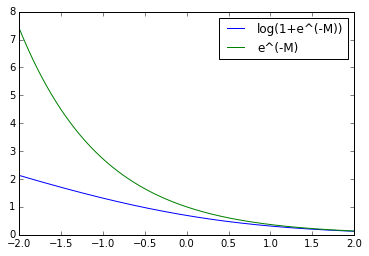

In [142]:
rng = np.linspace(-2, 2, 10000)
L1 = np.log(1 + np.exp(-rng))
L2 = np.exp(-rng)
plt.plot(rng, L1, label='log(1+e^(-M))')
plt.plot(rng, L2, label='e^(-M)')
plt.legend()